## Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

### 1.1. Скачать данные 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости


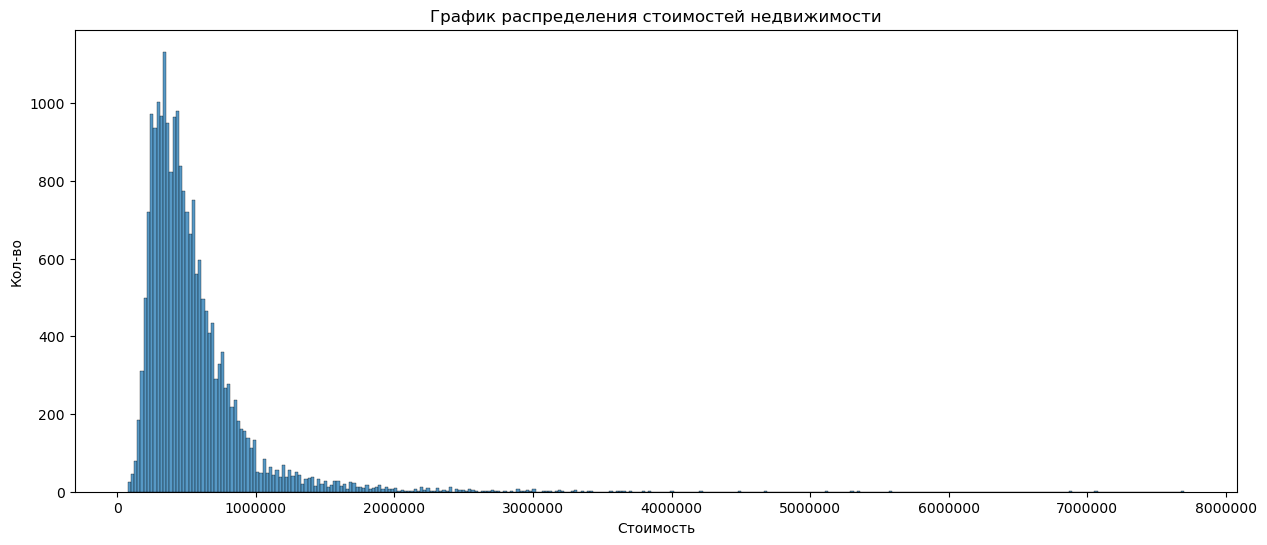

In [3]:
plt.figure(figsize=(15, 6))
sns.histplot(df['price'])
plt.ticklabel_format(style='plain')
plt.title('График распределения стоимостей недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');

Недвижимость, стоимостью до 1 млн, наиболее часто встречается в данных.

### 1.3 Изучите распределение квадратуры жилой

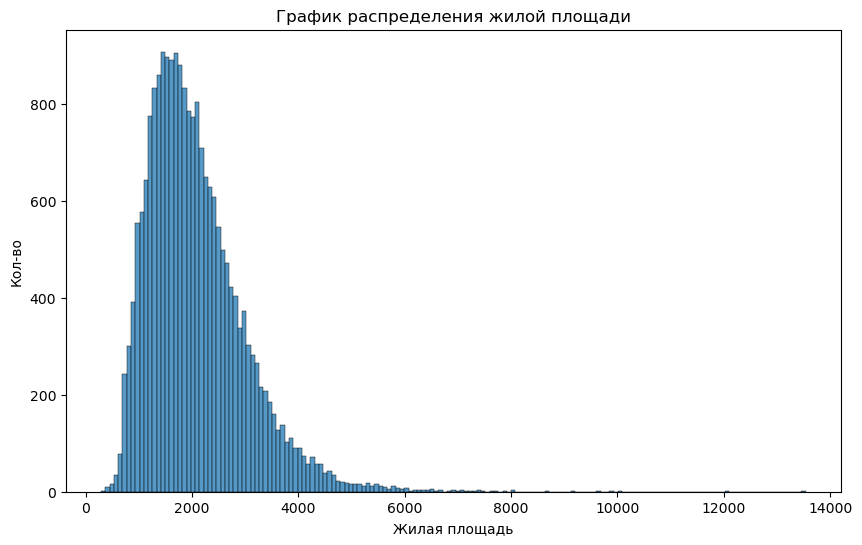

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sqft_living'])
plt.title('График распределения жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во');

Большая часть недвижимости имеет жилую площадь от 1000 до 4000.

### 2.1.4 Изучите распределение года постройки

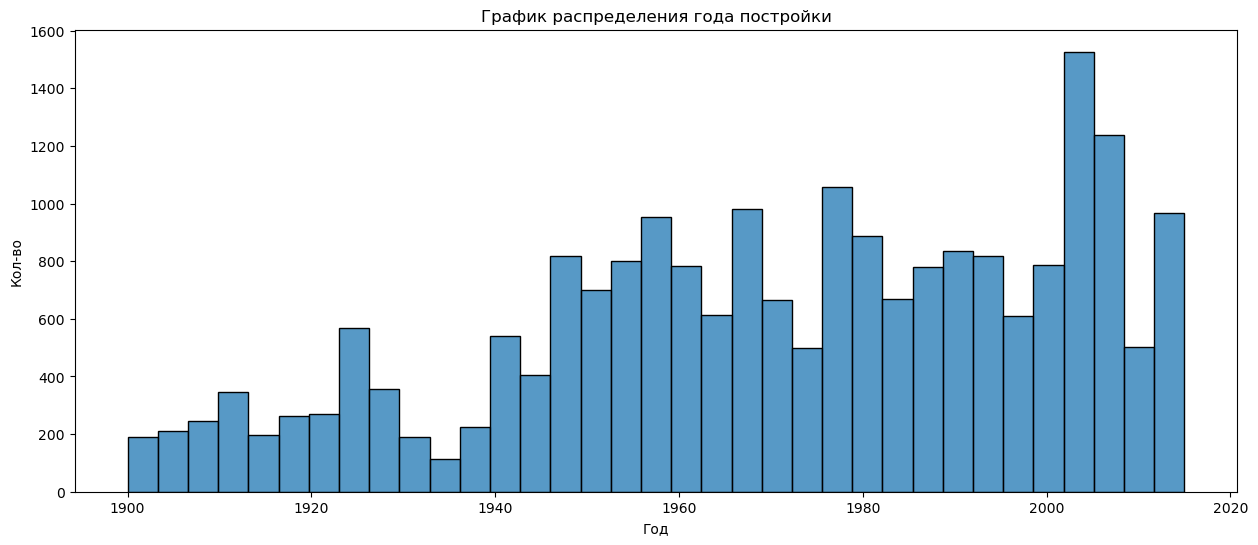

In [5]:
plt.figure(figsize=(15, 6))
sns.histplot(df['yr_built'])
plt.ticklabel_format(style='plain')
plt.title('График распределения года постройки')
plt.xlabel('Год')
plt.ylabel('Кол-во');

## 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [6]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

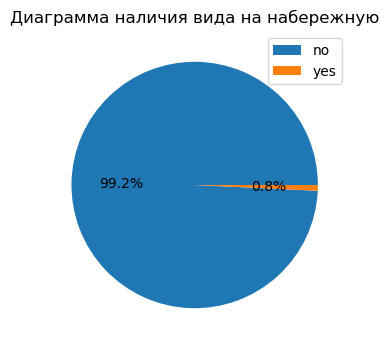

In [7]:
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.title('Диаграмма наличия вида на набережную')
plt.legend(['no', 'yes']);

Подавляющая часть домов не имеет вида на набережную.

### 2.2 Изучите распределение этажей домов

In [8]:
data = df['floors'].value_counts().reset_index()
data

,index,floors
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


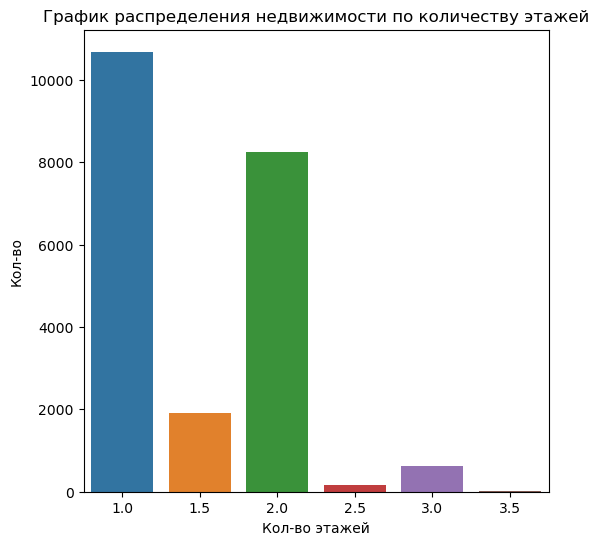

In [9]:
plt.figure(figsize=(6, 6))
sns.barplot(x=data['index'], y=data['floors'])
plt.title('График распределения недвижимости по количеству этажей')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во');

Наиболее распространены одноэтажные здания.

### 2.2 Изучите распределение состояния домов

In [10]:
data = df['condition'].value_counts().reset_index()
data

,index,condition
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


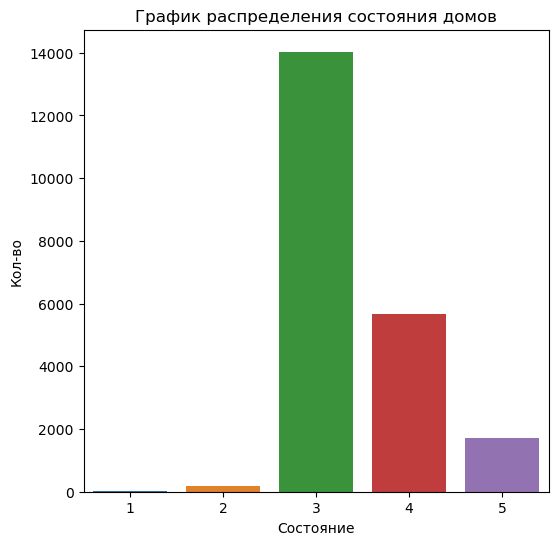

In [11]:
plt.figure(figsize=(6, 6))
sns.barplot(x=data['index'], y=data['condition'])
plt.title('График распределения состояния домов')
plt.xlabel('Состояние')
plt.ylabel('Кол-во');

На графике видно, что подавляющее количество недвижимости имеет удовлетворительное состояние.

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

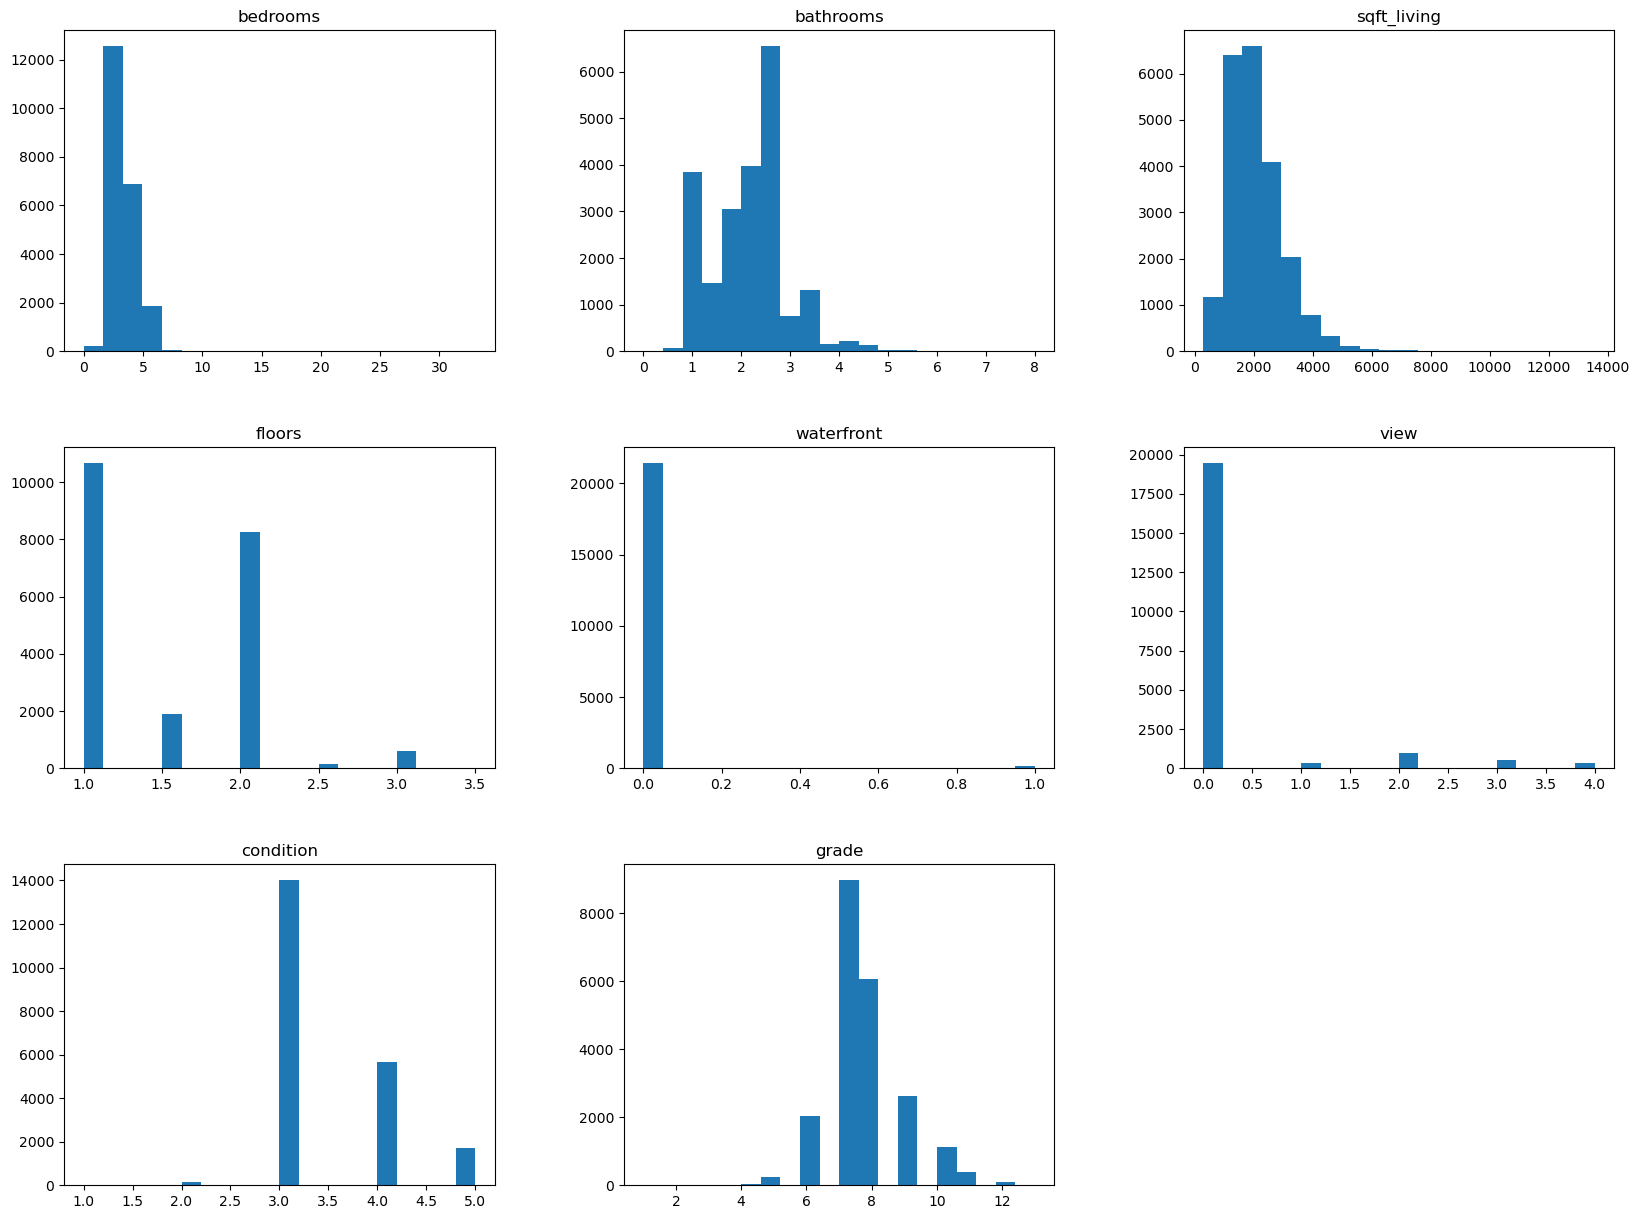

In [12]:
data = df.drop(['id', 'price', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'], axis=1)
data.hist(figsize=(20, 15), bins=20, grid=False);

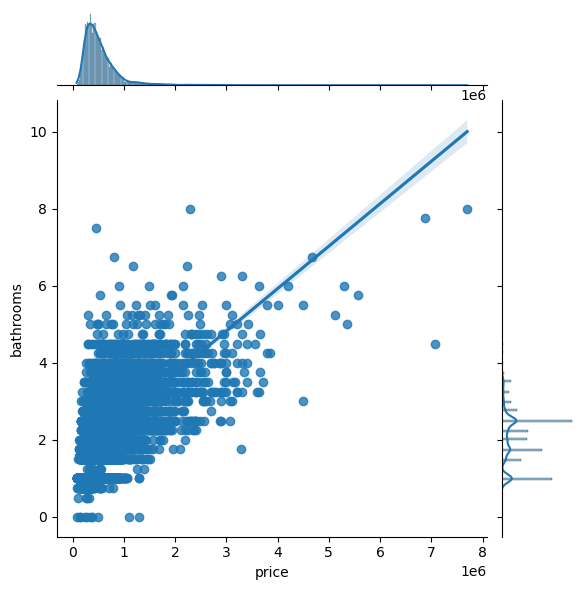

In [13]:
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg');

На данном графике показана зависимость цены от количества ванных комнат. Как можно заметить, чем больше ванных комнат, тем выше стоимость недвижимости.

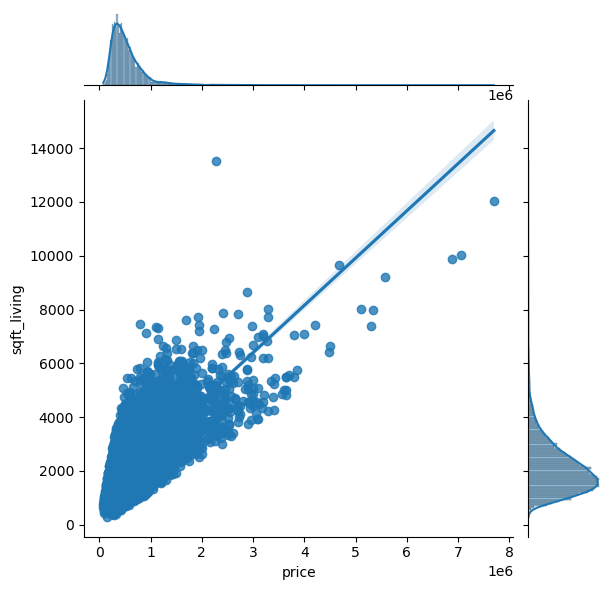

In [14]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

На данном графики мы можем наблюдать прямую линейную зависимость стоимости недвижимости от размера жилой площади.

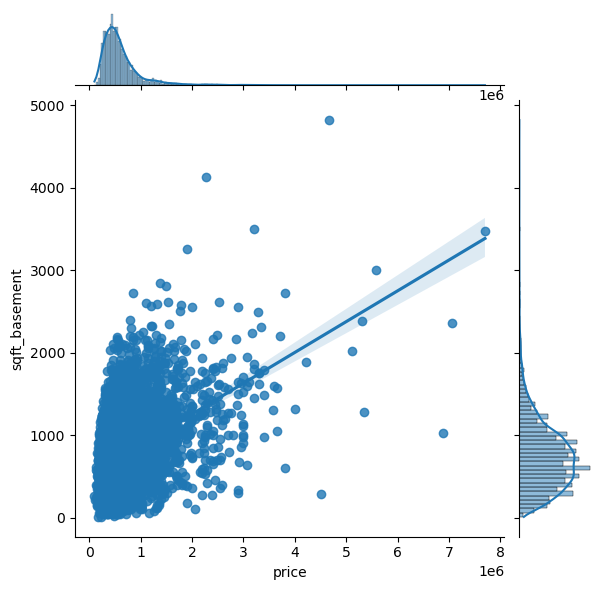

In [15]:
data2 = df[df['sqft_basement'] > 0]
sns.jointplot(x=data2['price'], y=data2['sqft_basement'], kind='reg');

На графики видно, что стоимость недвижимости с подвалами зависит от площади подвала.

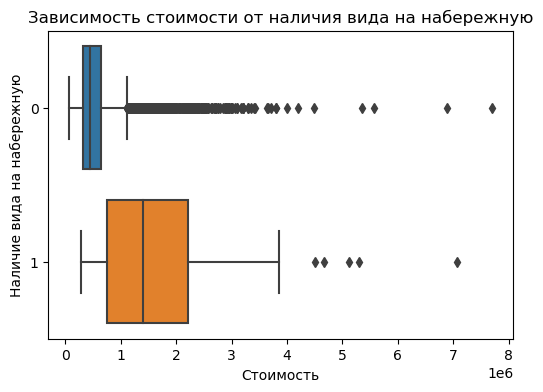

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price'], y=df['waterfront'].astype(str), whis=1.5)
plt.title('Зависимость стоимости от наличия вида на набережную')
plt.xlabel('Стоимость')
plt.ylabel('Наличие вида на набережную');

Можно заметить, что у домов без вида присутствует много выбросов. Можно их удалить.

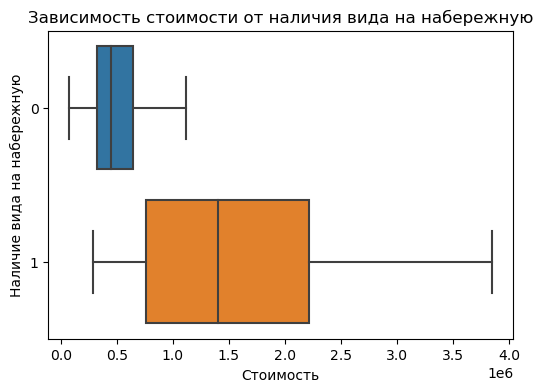

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price'], y=df['waterfront'].astype(str), whis=1.5, showfliers=False)
plt.title('Зависимость стоимости от наличия вида на набережную')
plt.xlabel('Стоимость')
plt.ylabel('Наличие вида на набережную');

На данном графике видно, что недвижимость с видом на набережную действительно дороже.

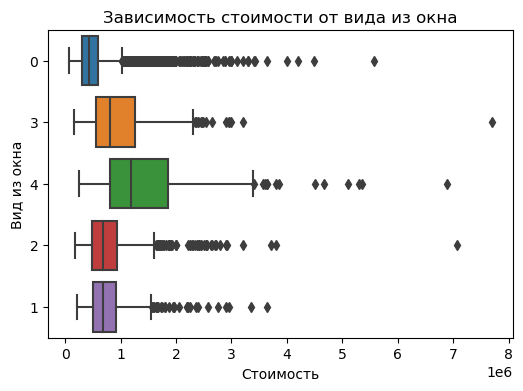

In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price'], y=df['view'].astype(str), whis=1.5)
plt.title('Зависимость стоимости от вида из окна')
plt.xlabel('Стоимость')
plt.ylabel('Вид из окна');

По данному графику можно понять, что чем лучше вид из окна, тем дороже стоимость недвижимости.